# Creating synthetic dataset for seismogram clustering

This notebook explains the creation of multiple synthetic seismogram sets oriented toward unsupervised learning of earthquake mechanisms.

The seismogram is dependent on multiple processes involved in earthquake generation and propagation including

    - Source characeteristics
        - Moment tensor/mechanism
        - Source time function 
            - length of slip event
            - Asperity events along the fault surface
    - Propagation medium
        - 3D velocity structure
        - 3D anelasticity/attenuation
        - Scattering
        - 
        
This project, inspired in part by Holtzman et al, will explore moment tensor and source time functions.


First to try is boxcar (or triangular) source time functions and randomly oriented moment tensors of several types of source mechanisms, also from multiple depths and source-reciever distances? Also add gaussian noise
This is done, pandas dataframes saved for nonnoisy and noisy synthetics in focalmechanism_synthetic_seismograms

Then will need to create a set of synthetic seismograms that have gutenberg richter and gaussian noise added to the _source time function_. Can either use 



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pyrocko import gf
from pyrocko import moment_tensor as mtm
from pyrocko.gf import LocalEngine
from scipy.stats import lognorm
from scipy.signal import spectrogram
from create_synthetic_seismograms import *

In [2]:
model = 'crust2_m5_hardtop_16Hz'

engine = LocalEngine(store_dirs=[model])

target = gf.Target(
       quantity='displacement',
       lat=0, lon=0.5,
       store_id=model,
       codes=('NET', 'STA', 'LOC', 'E'),
       tmin=10, tmax=75)
    
n=30
depths = [1000]*n
durations = np.random.randint(1,10,n)

df = createFocalMechanisms(n, depths, durations, target, engine, noisy=True, noise_factor=0.5)

#path='focalmechanism_synthetic_seismograms/'

#if os.path.exists(path)==False: os.mkdir(path)

#print(df)


24    8
Name: Duration, dtype: int64


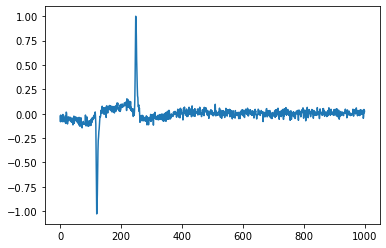

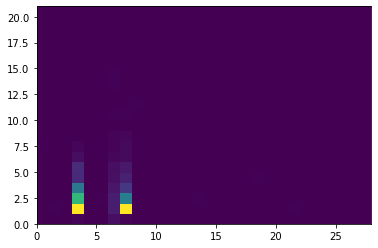

In [3]:
i = 24
plt.plot(df.iloc[[i]].Seismogram.values[0])
plt.figure()
plt.pcolormesh(df.iloc[[i]].Spectrogram.values[0])
print(df.iloc[[i]].Duration)

In [4]:
from scipy import signal 

In [5]:
x, Pxx=signal.periodogram(np.random.randn(10000000))

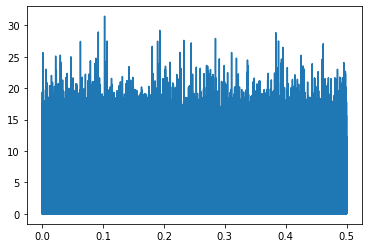

In [6]:
plt.plot(x, Pxx)

In [7]:
np.mean(Pxx[int(10000000/2):])

0.1590252912501338

In [8]:
x, Pxx=signal.periodogram(np.random.randn(10000000))

In [9]:
type(df.iloc[[2]].MomentTensor.values[0])

pyrocko.moment_tensor.MomentTensor

In [10]:
10*np.random.random(n)

array([7.51320764, 3.50776615, 7.08697038, 6.60835284, 8.59478652,
       7.25434843, 1.76125327, 5.08565802, 1.73951552, 9.68385268,
       7.70319535, 5.65142866, 0.88056477, 1.64958312, 0.7865644 ,
       8.3673346 , 2.26392073, 6.90761712, 7.09126223, 0.56728395,
       8.13352496, 1.51248162, 0.94205107, 5.74737714, 4.81272085,
       2.25907749, 0.65800937, 5.94015862, 9.51296441, 8.82076294])

In [11]:
np.random.randint(1,10,n)

array([8, 3, 2, 9, 2, 9, 7, 2, 8, 1, 9, 4, 4, 2, 7, 2, 4, 7, 9, 7, 7, 9,
       8, 7, 2, 2, 7, 4, 9, 3])

In [12]:
df = pd.read_pickle('focalmechanism_synthetic_seismograms/noisy/synthetics.pkl')

In [13]:
spectrograms = df.Spectrogram.values

In [14]:
spectrograms[0].shape

(21, 28)

In [15]:
np.save('focalmechanism_synthetic_seismograms/noisy/spectrograms.npy',np.dstack(spectrograms).swapaxes(0,2))

In [16]:
import tensorflow as tf

W0116 15:45:53.663889 140735767245696 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0116 15:45:53.770935 140735767245696 __init__.py:335] Limited tf.summary API due to missing TensorBoard installation.


In [17]:
tf.config.experimental_list_devices() 

['/job:localhost/replica:0/task:0/device:CPU:0']